# Στοιχεία Ομάδας

## Ομάδα Α23
Ξυπόλιτος Γεώργιος, 03113629

Πετρίδης Στέφανος Ευστράτιος, 03113418

# Εισαγωγη dataset και labels/feature extraction

Τα δεδομένα μας περιγράφουν μετρήσεις που έγιναν για την αναγνώριση σημάτων sonar τα οποία ανακλάστηκαν σε πέτρα ή σε μεταλλικό κύλινδρο. Κάθε μέτρηση/χαρακτηριστικό αντιπροσωπεύει την ενέγεια σε μια μπάντα συχνοτήτων για κάποιο χρονικό διάστημα, ενώ η ετικέτα του αντιπροσωπεύει άμα ανάκλαστηκε σε πέτρα ή σε μέταλλο, R και M αντίστοιχα.

In [115]:
from io import StringIO
import requests
import json
import pandas as pd
import numpy as np

# @hidden_cell
# This function accesses a file in your Object Storage. The definition contains your credentials.
# You might want to remove those credentials before you share your notebook.
def get_object_storage_file_with_credentials_fedf51108e6e474fa4e35bb0b6474bd2(container, filename):
    """This functions returns a StringIO object containing
    the file content from Bluemix Object Storage."""

    url1 = ''.join(['https://identity.open.softlayer.com', '/v3/auth/tokens'])
    data = {'auth': {'identity': {'methods': ['password'],
            'password': {'user': {'name': 'member_d0cfbcdbdc512597f0ccfb3e9fa8e371926ea524','domain': {'id': 'ea2b0617875b45aba36d1e3d7b98e9ee'},
            'password': 'W/Yb2WQY5ycDZ6j_'}}}}}
    headers1 = {'Content-Type': 'application/json'}
    resp1 = requests.post(url=url1, data=json.dumps(data), headers=headers1)
    resp1_body = resp1.json()
    for e1 in resp1_body['token']['catalog']:
        if(e1['type']=='object-store'):
            for e2 in e1['endpoints']:
                        if(e2['interface']=='public'and e2['region']=='dallas'):
                            url2 = ''.join([e2['url'],'/', container, '/', filename])
    s_subject_token = resp1.headers['x-subject-token']
    headers2 = {'X-Auth-Token': s_subject_token, 'accept': 'application/json'}
    resp2 = requests.get(url=url2, headers=headers2)
    return StringIO(resp2.text)

# Your data file was loaded into a StringIO object and you can process the data.
# Please read the documentation of pandas to learn more about your possibilities to load your data.
# pandas documentation: http://pandas.pydata.org/pandas-docs/stable/io.html
data_1 = get_object_storage_file_with_credentials_fedf51108e6e474fa4e35bb0b6474bd2('Lab1', 'sonar.all-data')

Αρχικά εισάγουμε τα δεδομένα στο pybook και εξάγουμε τα χαρακτηριστικά και την κλάση κάθε δείγματος.

In [116]:
data_df = pd.read_csv(data_1, header=None)

labels_df = data_df.iloc[:, -1]
features_df = data_df.iloc[:, :-1]

np_features = features_df.values

Τα δεδομένα μας βρίσκονται σε ένα CSV file, το οποίο παρατηρούμε ότι αποτελείται από δείγματα μετρήσεων σε κάθε γραμμή, στην οποία η τελευταία στήλη αποτελεί την κλάση του δείγματος, ενώ οι προηγούμενες στήλες αποτελούν τα χαρακτηριστικά του.

In [117]:
print labels_df[0]
print np_features[0]
print np_features.shape

R
[ 0.02    0.0371  0.0428  0.0207  0.0954  0.0986  0.1539  0.1601  0.3109
  0.2111  0.1609  0.1582  0.2238  0.0645  0.066   0.2273  0.31    0.2999
  0.5078  0.4797  0.5783  0.5071  0.4328  0.555   0.6711  0.6415  0.7104
  0.808   0.6791  0.3857  0.1307  0.2604  0.5121  0.7547  0.8537  0.8507
  0.6692  0.6097  0.4943  0.2744  0.051   0.2834  0.2825  0.4256  0.2641
  0.1386  0.1051  0.1343  0.0383  0.0324  0.0232  0.0027  0.0065  0.0159
  0.0072  0.0167  0.018   0.0084  0.009   0.0032]
(208, 60)


Όπως φαίνεται, δεν υπάρχει γραμμή επικεφαλίδων, ούτε στήλη αρίθμησης. Υπάρχουν 208 δείγματα/γραμμές, τα οποία αποτελούνται από 61 στήλες, από τις οποίες οι 60 είναι τα χαρακτηριστικά και η 1 το label του δείγματος.
Επίσης, παρατηρούμε ότι δεν υπάρχουν missing features σε κανένα από τα samples μας.

Κάνουμε mapping το R στο 0 και το Μ στο 1.

In [118]:
mapping = {'R': 0, 'M': 1}
labels_df = labels_df.replace(mapping)
np_labels = labels_df.values.flatten()
print np_labels

zeros = filter(lambda x: x == 0, np_labels)
ones = filter(lambda x: x == 1, np_labels)

print 'Number of Classes: 2'
print 'Percentage of R: %.2f%%' % (float(100 * len(zeros)) / (len(zeros) + len(ones)))
print 'Percentage of M: %.2f%%' % (float(100 * len(ones)) / (len(zeros) + len(ones)))
print 'Ratio M/R: %.2f%%' % (float(100 * len(ones)) / len(zeros))

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
Number of Classes: 2
Percentage of R: 46.63%
Percentage of M: 53.37%
Ratio M/R: 114.43%


Παρατηρούμε ότι η αναλογία των κλάσεων στο dataset είναι ικανοποιητική, επομένως δεν χρειάζεται κάποιο oversampling ή downsampling.
Αφού ολοκληρωθεί η εξαγωγή των ετικετών και των χαρακτηριστικών από το dataset μας, χωρίζουμε σε train και test set τα δεδομένα μας.

## Διαχωρισμός δεδομένων σε train και test

Διαχωρίζουμε σύμφωνα με την εκφώνηση το dataset μας σε train και test με ποσοστα 80% και 20% αντίστοιχα.

In [66]:
from sklearn.model_selection import train_test_split

train, test, train_labels, test_labels = train_test_split(np_features, np_labels, test_size=0.2, random_state=2037)

# Baseline Classification
## Εκπαίδευση και εκτίμηση των dummy classifiers

Σε αυτό το στάδιο δημιουργούμε αρχικά τους dummy classifiers για όλες τις περιπτώσεις.

In [91]:
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

dc_uniform = DummyClassifier(strategy='uniform')
dc_constant_0 = DummyClassifier(strategy='constant', constant=0)
dc_constant_1 = DummyClassifier(strategy='constant', constant=1)
dc_most_frequent = DummyClassifier(strategy='most_frequent')
dc_stratified = DummyClassifier(strategy='stratified')

Στη συνέχεια, εκπαιδεύουμε και υπολογίζουμε την ακρίβεια του κάθε dummy classifier που βρίσκεται στo dictionary dc_dict.

In [92]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support

dc_dict = {'Uniform': dc_uniform, 'Constant 0': dc_constant_0, 'Constant 1': dc_constant_1, 'Most frequent': dc_most_frequent, 'Stratified': dc_stratified}
f1_m = dict()
f1_w = dict()
accuracy = dict()
confusion = []
classifier = ['Uniform', 'Constant 0', 'Constant 1', 'Most frequent', 'Stratified']
for dc in classifier:
    dc_dict[dc].fit(train, train_labels)
    pred = dc_dict[dc].predict(test)
    t = precision_recall_fscore_support(test_labels, pred, average='weighted')
    print 'F1-Weighted Average for %s: %.2f' % (dc, t[2])
    f1_w[dc] = t[2]
    t = precision_recall_fscore_support(test_labels, pred, average='macro')
    print 'F1-Macro Average for %s: %.2f' % (dc, t[2])
    f1_m[dc] = t[2]
    accuracy[dc] = accuracy_score(test_labels, pred)
    confusion.append(confusion_matrix(test_labels, pred).ravel())
    print '\n'

print "Dummy Classifier Accuracy"
print "------------------------------------------------"
print "Classifier\tAccuracy\t(TN, FN, TP, FP)"
print "Uniform:\t%.2f%%\t\t(%d, %d, %d, %d)" % (100*accuracy['Uniform'], confusion[0][0], confusion[0][1], confusion[0][2], confusion[0][3])
print "Constant 0:\t%.2f%%\t\t(%d, %d, %d, %d)" % (100*accuracy['Constant 0'], confusion[1][0], confusion[1][1], confusion[1][2], confusion[1][3])
print "Constant 1:\t%.2f%%\t\t(%d, %d, %d, %d)" % (100*accuracy['Constant 1'], confusion[2][0], confusion[2][1], confusion[2][2], confusion[2][3])
print "Most Frequent:\t%.2f%%\t\t(%d, %d, %d, %d)" % (100*accuracy['Most frequent'], confusion[3][0], confusion[3][1], confusion[3][2], confusion[3][3])
print "Stratified:\t%.2f%%\t\t(%d, %d, %d, %d)" % (100*accuracy['Stratified'], confusion[4][0], confusion[4][1], confusion[4][2], confusion[4][3])

F1-Weighted Average for Uniform: 0.40
F1-Macro Average for Uniform: 0.40


F1-Weighted Average for Constant 0: 0.26
F1-Macro Average for Constant 0: 0.30


F1-Weighted Average for Constant 1: 0.42
F1-Macro Average for Constant 1: 0.36


F1-Weighted Average for Most frequent: 0.42
F1-Macro Average for Most frequent: 0.36


F1-Weighted Average for Stratified: 0.51
F1-Macro Average for Stratified: 0.50


Dummy Classifier Accuracy
------------------------------------------------
Classifier	Accuracy	(TN, FN, TP, FP)
Uniform:	40.48%		(9, 9, 16, 8)
Constant 0:	42.86%		(18, 0, 24, 0)
Constant 1:	57.14%		(0, 18, 0, 24)
Most Frequent:	57.14%		(0, 18, 0, 24)
Stratified:	52.38%		(6, 12, 8, 16)


Τα TN, FN, TP, FP σημαίνουν true negative, false negative, true positive, false positive αντίστοιχα, όπου true negative είναι η αντιστοίχιση ενός δείγματος της κλάσης 0 στην 0, false negative η αντιστοίχιση ενός στοιχείου της κλάσης 1 στην 0 και αντίστοιχα για τα άλλα δύο.

Παρατηρούμε ότι για τους classifiers που κάνουν είτε σταθερή εκτίμηση όλων των test με βάση μία κλάση που ορίσαμε εμείς, είτε από την πιο συχνή κλάση, η ακρίβεια είναι σταθερή σε κάθε εκτέλεση, το οποίο είναι λογικό και αναμενόμενο, δεδομένου ότι δεν αλλάζουν τα train και test sets. Από την άλλη πλευρά οι uniform και stratified dummy classifiers έχουν διαφορετική ακρίβεια σε κάθε εκτέλεση. Αυτό οφείλεται στο γεγονός ότι και οι δύο εκτιμούν την κλάση κάθε test sample με τυχαίο τρόπο. Ο uniform διαλέγοντας τυχαία μία από τις δύο κλάσεις, ενώ ο stratified, διαλέγοντας μία από τις κλάσεις με πιθανότητα ίση με την σχετική εμφάνισή της στο training set. Επειδή στο dataset έχουμε περίπου ίδιο αριθμό δειγμάτων και από τις δύο κλάσεις, οι δύο αυτοί ταξινομητές έχουν περίπου την ίδια πιθανότητα να επιλέξουν κάθε μία από τις κλάσεις. Αυτό, βέβαια, επηρεάζεται και από τον τρόπο που έχουν χωριστεί τα δεδομένα σε train και test, καθώς ο stratified θα επηρεαστεί από το ποσοστό ύπαρξης κάποιας κλάσης στα train data.

## Εκπαίδευση και εκτίμηση του Multi-Layer Perceptron (MLP)

Σε αυτό το στάδιο δημιουργούμε ένα perceptron, για το οποίο δεν αρχικοποιούμε καμία παράμετρο, εκτός της max_iter, για να αποφύγουμε το warning που αφορά την έλλειψη σύγκλισης με το default maximum iteration parameter. Ο solver που χρησιμοποιήθηκε ήταν ο lbfgs καθώς οι άλλοι δύο δεν ενδείκνυνται για μικρά datasets.

In [93]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report

clf = MLPClassifier(solver='lbfgs')
clf.fit(train, train_labels)
pred = clf.predict(test)

label_names = ['R', 'M']
t = precision_recall_fscore_support(test_labels, pred, average='weighted')
print 'F1-Weighted Average for Standard MLP: %.2f' % t[2]
f1_w['Standard MLP'] = t[2]

t = precision_recall_fscore_support(test_labels, pred, average='macro')
print 'F1-Macro Average for Standard MLP: %.2f' % t[2]
print '\n'
f1_m['Standard MLP'] = t[2]
print classification_report(test_labels, pred, target_names=label_names)

cm = confusion_matrix(test_labels, pred).ravel()
print 'TN: %d' % cm[0]
print 'FN: %d' % cm[1]
print 'TP: %d' % cm[2]
print 'FP: %d' % cm[3]

accuracy['Standard MLP'] = accuracy_score(test_labels, pred)

F1-Weighted Average for Standard MLP: 0.78
F1-Macro Average for Standard MLP: 0.78


             precision    recall  f1-score   support

          R       0.76      0.72      0.74        18
          M       0.80      0.83      0.82        24

avg / total       0.78      0.79      0.78        42

TN: 13
FN: 5
TP: 4
FP: 20


Βλέπουμε ότι με την χρήση MLP αυξάνεται αμέσως το ποσοστό αναγνώρισης, καθώς πλέον χρησιμοποιείται μεθοδικός τρόπος αναγνώρισης και όχι τυχαία επιλογή.

Bar plot for F1 Macro


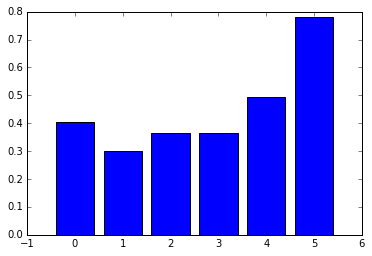

In [94]:
import matplotlib.pyplot as plt

print 'Bar plot for F1 Macro'
classifier.append('Standard MLP') 
plt.bar(range(len(f1_m.keys())), [f1_m[c] for c in classifier], align='center')
plt.show()

Bar plot for F1 Weighted


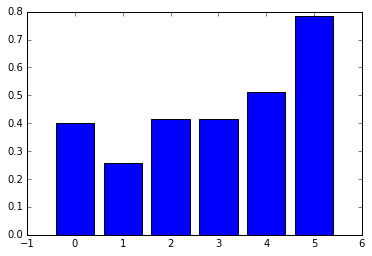

In [95]:
print 'Bar plot for F1 Weighted'
plt.bar(range(len(f1_w.keys())), [f1_w[c] for c in classifier], align='center')
plt.show()

Η σειρά των κατηγοριών είναι η εξής όπως φαίνονται στο διάγραμμα:
1. Uniform DC
2. Constant 0 DC
3. Constant 1 DC
4. Most Frequent DC
5. Stratified DC
6. Basic MLP

# Βελτιστοποίηση Παραμέτρων

Σε αυτό το notebook η βελτιστοποίηση των υπερπαραμέτρων γίνεται μόνο στο MLP.

Οι υπερπαράματροι προς βελτιστοποίση είναι οι εξής:

1. **hidden_layer_sizes**: που ελέγχει τον αριθμό των νευρώνων σε κάθε επίπεδο του MLP (στην περίπτωσή μας μόνο ένα επίπεδο).
2. **max_iter**: που ορίζει το πόσες επαναλήψεις θα κάνει ο αλγόριθμος πριν σταματήσει (δεν είναι απαραίτητο ότι δεν θα κάνει λιγότερες, απλώς είναι το άνω όριο).
3. **activation**: που ορίζει την συνάρτηση ενεργοποίησης των νευρώνων.
4. **learning_rate**: που ορίζει το ρυθμό εκμάθησης των νευρώνων.
5. **alpha**: που ορίζει το penalty του σφάλματος της L2 νόρμας.

Επίσης, υπάρχουν 3 είδη MLP στην βιβλιοθήκη. Επειδή όμως το dataset μας είναι σχετικά μικρό, θα χρησιμοποιηθεί ο lbfgs ως solver που όπως αναφέρεται στην βιβλιοθήκη ενδείκνυται για μικρά datasets.

Στον MLP οι παράμετροι προς βελτιστοποίηση είναι οι εξής: **hidden_layer_sizes, max_iter, activation και alpha**.

In [72]:
act = ['identity', 'logistic', 'tanh', 'relu']

alp = [0.1, 0.01, 0.001]
max_it = range(200, 251, 10)
hidden_layer = range(17, 23)

opt_score = 0
for al in alp:
    for m in max_it:
        for h in hidden_layer:  
            for a in act:
                clf = MLPClassifier(solver='lbfgs', alpha=al, max_iter=m,
                                    hidden_layer_sizes=(h,), activation=a)
                scores = cross_val_score(clf, train, train_labels, cv=10, scoring='f1_macro')
                if scores.mean() > opt_score:
                    opt_score = scores.mean()
                    opt_vals = [al, m, h, a]
                    
opt_scores = {'cv_mlp_f1m': opt_score}
opt_values = {'cv_mlp_f1m': opt_vals}
print opt_vals
print opt_score

[0.01, 240, 20, 'relu']
0.877021111414


Ξεκινώντας από το lbfgs και χρησιμοποιώντας την f1_macro μετρική, βλέπουμε το παραπάνω αποτέλεσμα βελτιστοποίησης.

Τα ranges των υπερπαραμέτρων που φαίνονται παραπάνω είναι τα ranges που δοκιμάστηκαν τελικά, δηλαδή αυτά για τα οποία αφού παρατηρήσαμε πιθανή βελτιστοποίηση σε ακραίες τιμές, τα τροποποιήσαμε κατάλληλα ώστε να βρίσκεται η οριακή τιμή στο κέντρο των ranges. Αυτή η τακτική ακολουθήθηκε και για όλα τα παρακάτω παραδείγματα.

Με βάση τις παραπάνω τιμές δημιουργούμε τον ταξινομητή και μετράμε τον χρόνο εκπαίδευσης και πρόβλεψης του.

In [96]:
import time

classifier.append('MLP Cross Validation F1 Macro')

clf = MLPClassifier(solver='lbfgs', alpha=opt_vals[0], max_iter=opt_vals[1],
                    hidden_layer_sizes=(opt_vals[2],), activation=opt_vals[3])

start_time = time.time()
clf.fit(train, train_labels)
mid_time = time.time()
pred = clf.predict(test)
fin_time = time.time()

print "Fit: %.2f seconds" % (mid_time - start_time)
print "Predict: %.2f seconds" % (fin_time - mid_time)
print "Total: %.2f seconds" % (fin_time - start_time)

t = precision_recall_fscore_support(test_labels, pred, average='weighted')
print 'F1-Weighted Average for Optimised MLP Weighted: %.2f' % t[2]
f1_w['MLP Cross Validation F1 Macro'] = t[2]
print 'F1-Macro Average for Optimised MLP Macro: %.2f' % t[2]
t = precision_recall_fscore_support(test_labels, pred, average='macro')
f1_m['MLP Cross Validation F1 Macro'] = t[2]
print '\n'
print classification_report(test_labels, pred, target_names=label_names)
cm = confusion_matrix(test_labels, pred).ravel()
print 'TN: %d' % cm[0]
print 'FN: %d' % cm[1]
print 'TP: %d' % cm[2]
print 'FP: %d' % cm[3]

accuracy['MLP Cross Validation F1 Macro'] = accuracy_score(test_labels, pred)

Fit: 0.11 seconds
Predict: 0.00 seconds
Total: 0.11 seconds
F1-Weighted Average for Optimised MLP Weighted: 0.76
F1-Macro Average for Optimised MLP Macro: 0.76


             precision    recall  f1-score   support

          R       0.75      0.67      0.71        18
          M       0.77      0.83      0.80        24

avg / total       0.76      0.76      0.76        42

TN: 12
FN: 6
TP: 4
FP: 20


In [75]:
max_it = range(200, 251, 10)
hidden_layer = range(12, 16)
alp = [0.1, 0.01, 0.001]

opt_score = 0
for al in alp:
    for m in max_it:
        for h in hidden_layer:
            for a in act:
                clf = MLPClassifier(solver='lbfgs', alpha=al, max_iter=m,
                                    hidden_layer_sizes=(h,), activation=a)
                scores = cross_val_score(clf, train, train_labels, cv=10, scoring='f1_weighted')
                if scores.mean() > opt_score:
                    opt_score = scores.mean()
                    opt_vals = [al, m, h, a]

opt_scores = {'cv_mlp_f1w': opt_score}
opt_values = {'cv_mlp_f1w': opt_vals}
print opt_vals
print opt_score

[0.01, 200, 14, 'tanh']
0.886393525374


Χρησιμοποιώντας τον ίδιο classifier με την f1_weighted μετρική αυτή την φορά παίρνουμε το παραπάνω αποτέλεσμα.

Παρατηρούμε ότι με διαφορετικές μετρικές, παίρνουμε διαφορετικές βέλτιστες παραμέτρους. Επίσης, οι βέλτιστες παράμετροι επηρεάζονται και από το διαχωρισμό του dataset σε train και test.

Με βάση τις παραπάνω τιμές δημιουργούμε τον ταξινομητή και μετράμε τον χρόνο εκπαίδευσης και πρόβλεψης του.

In [97]:
import time

classifier.append('MLP Cross Validation F1 Weighted')

clf = MLPClassifier(solver='lbfgs', alpha=opt_vals[0], max_iter=opt_vals[1],
                    hidden_layer_sizes=(opt_vals[2],), activation=opt_vals[3])

start_time = time.time()
clf.fit(train, train_labels)
mid_time = time.time()
pred = clf.predict(test)
fin_time = time.time()

print "Fit: %s seconds" % (mid_time - start_time)
print "Predict: %s seconds" % (fin_time - mid_time)
print "Total: %s seconds" % (fin_time - start_time)

t = precision_recall_fscore_support(test_labels, pred, average='weighted')
print 'F1-Weighted Average for Optimised MLP Weighted: %.2f' % t[2]
f1_w['MLP Cross Validation F1 Weighted'] = t[2]
print 'F1-Macro Average for Optimised MLP Weighted: %.2f' % t[2]
t = precision_recall_fscore_support(test_labels, pred, average='macro')
f1_m['MLP Cross Validation F1 Weighted'] = t[2]
print '\n'
print classification_report(test_labels, pred, target_names=label_names)
cm = confusion_matrix(test_labels, pred).ravel()
print 'TN: %d' % cm[0]
print 'FN: %d' % cm[1]
print 'TP: %d' % cm[2]
print 'FP: %d' % cm[3]

confusion.append(confusion_matrix(test_labels, pred).ravel())
accuracy['MLP Cross Validation F1 Weighted'] = accuracy_score(test_labels, pred)

Fit: 0.103738069534 seconds
Predict: 0.000242948532104 seconds
Total: 0.103981018066 seconds
F1-Weighted Average for Optimised MLP Weighted: 0.78
F1-Macro Average for Optimised MLP Weighted: 0.78


             precision    recall  f1-score   support

          R       0.76      0.72      0.74        18
          M       0.80      0.83      0.82        24

avg / total       0.78      0.79      0.78        42

TN: 13
FN: 5
TP: 4
FP: 20


Bar plot for f1_macro
8
[0.40442427680090753, 0.29999999999999999, 0.36363636363636365, 0.36363636363636365, 0.49519230769230765, 0.7795918367346939, 0.75294117647058822, 0.7795918367346939]


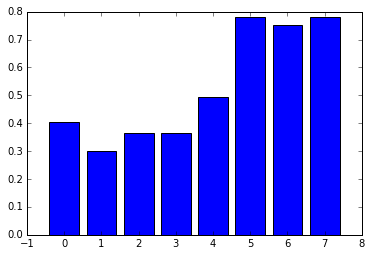

In [98]:
print 'Bar plot for f1_macro'
print len(f1_m.keys())
print [f1_m[c] for c in classifier]
plt.bar(range(len(f1_m.keys())), [f1_m[c] for c in classifier], align='center')
plt.show()

Bar plot for f1_macro


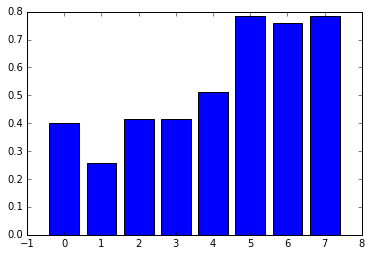

In [99]:
print 'Bar plot for f1_macro'
plt.bar(range(len(f1_w.keys())), [f1_w[c] for c in classifier], align='center')
plt.show()

Η σειρά των κατηγοριών είναι η εξής όπως φαίνονται στο διάγραμμα:
1. Uniform DC
2. Constant 0 DC
3. Constant 1 DC
4. Most Frequent DC
5. Stratified DC
6. Basic MLP
7. f1_macro MLP optimised
8. f1_weighted MLP optimised

Γενικώς παρατηρήθηκε ότι το μέταλλο ήταν πιο εύκολα ανιχνεύσιμο ενώ παράληλλα δεν ταξινομούσαμε συχνά και πέτρες ως μέταλλα. Σε αντίθεση η πέτρα ήταν δυσκολότερα ανιχνεύσιμη και παράλληλα ταξινομούνταν πιο συχνά μέταλλα ως πέτρες. Αυτά τα βλέπουμε από τα precision και recall αντίστοιχα. Δηλάδη όσο πιο υψηλό precision τόσο περισσότερα τα true positive(σωστή ταξινόμηση άμα είχαμε multiclass) και όσο πιο χαμηλό το recall, τόσο περισσότερα false positive(λάθος ταξινόμηση αντικειμένων άλλων κατηγοριών στην κατηγορία στην οποία αναφέρεται το recall).